In [17]:
import numpy as np
from astropy import units as u
from astropy import time
from astropy import coordinates as c

from poliastro.bodies import Earth
from poliastro.twobody import Orbit
from poliastro.twobody.propagation import propagate
from poliastro.examples import iss
import matplotlib.pyplot as plt
from poliastro import iod
from poliastro.bodies import Earth, Mars, Sun
from poliastro.ephem import Ephem
from poliastro.maneuver import Maneuver
from poliastro.twobody import Orbit
from poliastro.util import time_range
from poliastro.plotting import OrbitPlotter3D, StaticOrbitPlotter
#from poliastro.earth.atmosphere import COESA76
from poliastro.twobody.propagation import cowell
from poliastro.plotting import OrbitPlotter3D
from poliastro.util import norm
import plotly.io as pio
pio.renderers.default = "notebook_connected"
from poliastro.twobody.events import LithobrakeEvent
from astropy.coordinates import SphericalRepresentation
import math as Math
from poliastro.twobody import Orbit

from scipy.ndimage import rotate
from scipy.spatial.transform import Rotation as R
from poliastro.mars_atm import MartianAtmosphere



In [20]:

atmosphere = MartianAtmosphere()
test_altitudes = [-10, 0, 10, 40, 100]  # altitudes in km
for alt in test_altitudes:
    props = atmosphere.properties(alt)
    print(f"Altitude: {alt:>4} km | Temperature: {props['temperature_K']:6.2f} K | "
            f"Pressure: {props['pressure_Pa']:8.2f} Pa | Density: {props['density_kg_m3']:7.5f} kg/m^3")




Altitude:  -10 km | Temperature: 223.00 K | Pressure:  1510.83 Pa | Density: 0.03585 kg/m^3
Altitude:    0 km | Temperature: 210.00 K | Pressure:   610.00 Pa | Density: 0.01537 kg/m^3
Altitude:   10 km | Temperature: 197.00 K | Pressure:   232.42 Pa | Density: 0.00624 kg/m^3
Altitude:   40 km | Temperature: 158.00 K | Pressure:     8.31 Pa | Density: 0.00028 kg/m^3
Altitude:  100 km | Temperature: 158.00 K | Pressure:     0.00 Pa | Density: 0.00000 kg/m^3


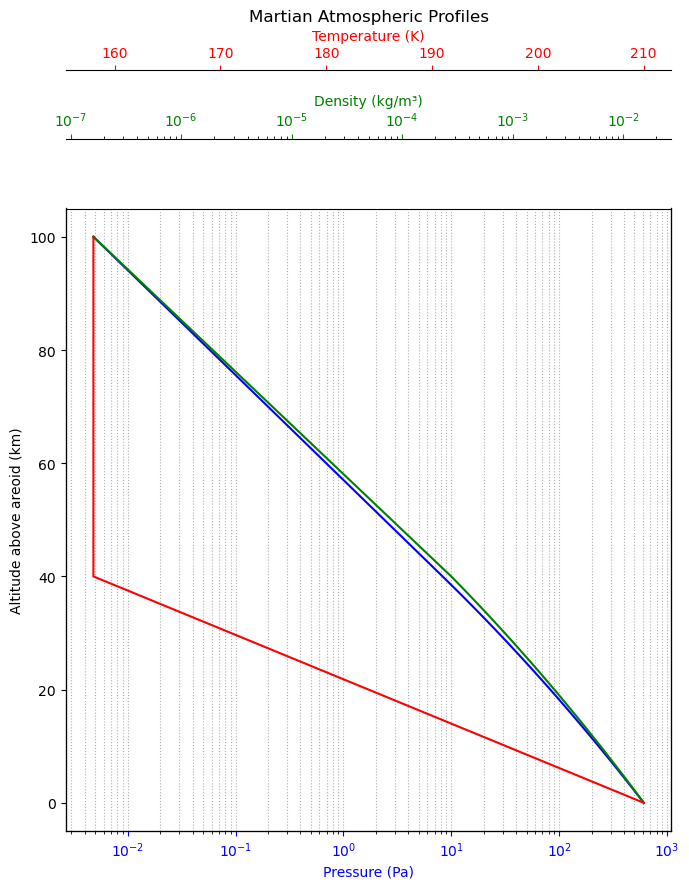

In [ ]:
# Define the altitude range in km (0 to 100 km)
altitudes_km = np.linspace(0, 100, 101)
# Initialize lists for state parameters
temperatures = []
pressures = []
densities = []

# Compute properties over the altitude range
for alt in altitudes_km:
    props = atmosphere.properties(alt)
    pressures.append(props[])
    densities.append(props["density_kg_m3"])
    temperatures.append(props["temperature_K"])

# Create a figure and the main axes for Pressure
fig, ax_pressure = plt.subplots(figsize=(7, 9))

# Plot Pressure vs. Altitude on a log scale
ax_pressure.set_xscale('log')
ax_pressure.plot(pressures, altitudes_km, color='blue', label='Pressure')
ax_pressure.set_xlabel('Pressure (Pa)', color='blue')
ax_pressure.set_ylabel('Altitude above areoid (km)')
ax_pressure.tick_params(axis='x', colors='blue')
ax_pressure.grid(True, which='both', axis='x', linestyle=':')

# You can optionally set specific log limits for pressure:
# ax_pressure.set_xlim(1e-2, 1e3)

# Create a twin x-axis for Density
ax_density = ax_pressure.twiny()
ax_density.set_xscale('log')
ax_density.plot(densities, altitudes_km, color='green', label='Density')
ax_density.set_xlabel('Density (kg/m³)', color='green')
ax_density.tick_params(axis='x', colors='green')
ax_density.spines['top'].set_position(('outward', 50))  
ax_density.grid(False)

# Optionally set density axis limits:
# ax_density.set_xlim(1e-9, 1e-2)

# Create a second twin x-axis for Temperature
ax_temp = ax_pressure.twiny()
ax_temp.plot(temperatures, altitudes_km, color='red', label='Temperature')
ax_temp.set_xlabel('Temperature (K)', color='red')
ax_temp.tick_params(axis='x', colors='red')
ax_temp.spines['top'].set_position(('outward', 100))  
ax_temp.grid(False)

# Optionally set temperature axis limits:
# ax_temp.set_xlim(140, 240)

plt.title('Martian Atmospheric Profiles')
plt.tight_layout()
plt.show()